# A Hands-on Introduction to `pandas` using Google's Covid-19 Community Mobility Data
***

Data wrangling, exploration, and visualisation with `pandas`, SC207 Computational Social Sceince, Sociology, University of Essex, November 2020

## This Jupyter Notebook tutorial
* Hands-on tutorial on data wrangling, exploratory data analysis and visualisation with `pandas` and `seaborn`.
* Analysis of the [GoogleCOVID-19 Community Mobility Reports](https://www.google.com/covid19/mobility/), a large anonimised and open data set of aggreagate mobility trends tracing how global communities respond to Covid-19. 
* Real-world examples and understanding of local mobility trends in the United Kingdom and Essex in comparison to other countries and counties.

## `pandas`
[Getting started with pandas](https://pandas.pydata.org/docs/getting_started/index.html#getting-started)
* `pandas` is a fast, powerful, and flexible open source tool for doing real world data analysis and manipulation in Python

<img src="https://upload.wikimedia.org/wikipedia/commons/e/ed/Pandas_logo.svg" title='Pandas Logo' width="400" height="200"/>

### Dataset: Google Covid-19 Community Mobility Data
* Aggregated, anonymized sets of data that protect individual privacy.
* The data shows trends of human movement over time by country and region, across different categories of places (e.g., retail and recreation, groceries and pharmacies, parks, transit stations, workplaces, and residential).
* Provides an opportunity to explore how movement trends have changed as a response to non-pharmaceutical public health interventions (e.g., lockdowns, school closure)  designed to reduce the spread of Covid-19.

<img src="https://www.google.com/covid19/static/reports-icon-grid.png" title='Google Covid-19 Community Mobility Data' width="400" height="200"/>

In [1]:
# To use pandas, we first import the pandas library via the Python's import command

import pandas as pd
pd.__version__

'1.0.5'

In [2]:
# Import other libbraries we will use to analyse and visualise data 

import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading your data

Pandas supports many data file formats, including csv, excel, sql, json.
For details, see [How do I read and write tabular data?](https://pandas.pydata.org/docs/getting_started/intro_tutorials/02_read_write.html#min-tut-02-read-write)

<img src="https://pandas.pydata.org/docs/_images/02_io_readwrite.svg" width="800" height="400" >

### Loading data from the Web

In [3]:
# Covid-19 Google Community Mobility Reports (GCMR) is provided as a CSV file
# To load a CSV data file, we use the read_csv function
# The code below loads the most recent online version of the data

gcmr_df = pd.read_csv('https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv')

# Pandas represents tabular data as a DataFrame
gcmr_df

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2808265,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-10-19,NaN,NaN,NaN,NaN,-3.0,NaN
2808266,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-10-20,NaN,NaN,NaN,NaN,8.0,NaN
2808267,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-10-21,NaN,NaN,NaN,NaN,9.0,NaN
2808268,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-10-22,NaN,NaN,NaN,NaN,9.0,NaN


### Loading data from your computer

In [4]:
# The same read_csv function can be used to load the file Global_Mobility_Report.csv from your computer 
# Prerequisite: the file needs to be pre-downloaded from https://www.google.com/covid19/mobility/
# Replace 'Downloads' with the actual folder in which the file is stored in your computer

gcmr_df2 = pd.read_csv('~/Downloads/Global_Mobility_Report.csv')

## Pandas DataFrame

['A DataFrame is a 2-dimensional data structure that can store data of different types (including characters, integers, floating point values, categorical data and more) in columns.'](https://pandas.pydata.org/docs/getting_started/intro_tutorials/01_table_oriented.html#min-tut-01-tableoriented)

<img src="https://pandas.pydata.org/docs/_images/01_table_dataframe.svg" title='Pandas DataFrame' width="400" height="200"/>

## Viewing data

In [5]:
# Show the first five rows
gcmr_df.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


In [6]:
# Show the last five rows 
gcmr_df.tail()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
2808265,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-10-19,NaN,NaN,NaN,NaN,-3.0,NaN
2808266,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-10-20,NaN,NaN,NaN,NaN,8.0,NaN
2808267,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-10-21,NaN,NaN,NaN,NaN,9.0,NaN
2808268,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-10-22,NaN,NaN,NaN,NaN,9.0,NaN
2808269,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-10-23,NaN,NaN,NaN,NaN,11.0,NaN


In [7]:
# Specify the number of rows to return
gcmr_df.tail(10)

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
2808260,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-10-12,NaN,NaN,NaN,NaN,-3.0,NaN
2808261,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-10-13,NaN,NaN,NaN,NaN,10.0,NaN
2808262,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-10-14,NaN,NaN,NaN,NaN,7.0,NaN
2808263,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-10-15,NaN,NaN,NaN,NaN,0.0,NaN
2808264,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-10-16,NaN,NaN,NaN,NaN,6.0,NaN
2808265,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-10-19,NaN,NaN,NaN,NaN,-3.0,NaN
2808266,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-10-20,NaN,NaN,NaN,NaN,8.0,NaN
2808267,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-10-21,NaN,NaN,NaN,NaN,9.0,NaN
2808268,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-10-22,NaN,NaN,NaN,NaN,9.0,NaN
2808269,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-10-23,NaN,NaN,NaN,NaN,11.0,NaN


In [8]:
# Columns, Index, Values
gcmr_df.columns

Index(['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2',
       'metro_area', 'iso_3166_2_code', 'census_fips_code', 'date',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object')

In [9]:
gcmr_df.index

RangeIndex(start=0, stop=2808270, step=1)

In [10]:
gcmr_df.values

array([['AE', 'United Arab Emirates', nan, ..., 0.0, 2.0, 1.0],
       ['AE', 'United Arab Emirates', nan, ..., 1.0, 2.0, 1.0],
       ['AE', 'United Arab Emirates', nan, ..., 1.0, 2.0, 1.0],
       ...,
       ['ZW', 'Zimbabwe', 'Midlands Province', ..., nan, 9.0, nan],
       ['ZW', 'Zimbabwe', 'Midlands Province', ..., nan, 9.0, nan],
       ['ZW', 'Zimbabwe', 'Midlands Province', ..., nan, 11.0, nan]],
      dtype=object)

In [11]:
type(gcmr_df)

pandas.core.frame.DataFrame

In [12]:
# The DataFrame contains 2.8M rows and 14 columns  

gcmr_df.shape

(2808270, 14)

In [13]:
gcmr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2808270 entries, 0 to 2808269
Data columns (total 14 columns):
 #   Column                                              Dtype  
---  ------                                              -----  
 0   country_region_code                                 object 
 1   country_region                                      object 
 2   sub_region_1                                        object 
 3   sub_region_2                                        object 
 4   metro_area                                          object 
 5   iso_3166_2_code                                     object 
 6   census_fips_code                                    float64
 7   date                                                object 
 8   retail_and_recreation_percent_change_from_baseline  float64
 9   grocery_and_pharmacy_percent_change_from_baseline   float64
 10  parks_percent_change_from_baseline                  float64
 11  transit_stations_percent_change_from_

## Accessing columns amd rows in your data

### Accessing columns
We can access columns via column name and column position.

In [14]:
# get the country column and save it to its own variable
gcmr_df_country = gcmr_df[['country_region']]

In [15]:
gcmr_df_country.head()

,country_region
0,United Arab Emirates
1,United Arab Emirates
2,United Arab Emirates
3,United Arab Emirates
4,United Arab Emirates


In [16]:
type(gcmr_df_country)

pandas.core.frame.DataFrame

The double square bracket option `[[]]` gives DataFrame; the single square braket `[]` option gives Series

In [17]:
# single square brackets returns Series
gcmr_df_country = gcmr_df['country_region']
gcmr_df_country.head()

0    United Arab Emirates
1    United Arab Emirates
2    United Arab Emirates
3    United Arab Emirates
4    United Arab Emirates
Name: country_region, dtype: object

In [18]:
type(gcmr_df_country)

pandas.core.series.Series

In [19]:
# Accessing more than one column by using Python list syntax
gcmr_df_country_region_date = gcmr_df[['country_region', 'sub_region_1', 'date']]

In [20]:
gcmr_df_country_region_date.head()

,country_region,sub_region_1,date
0,United Arab Emirates,NaN,2020-02-15
1,United Arab Emirates,NaN,2020-02-16
2,United Arab Emirates,NaN,2020-02-17
3,United Arab Emirates,NaN,2020-02-18
4,United Arab Emirates,NaN,2020-02-19


In [21]:
# Accessing columns via column position
gcmr_df_country_region_date = gcmr_df.iloc[:, [1, 2, 7]]
gcmr_df_country_region_date.head()

,country_region,sub_region_1,date
0,United Arab Emirates,NaN,2020-02-15
1,United Arab Emirates,NaN,2020-02-16
2,United Arab Emirates,NaN,2020-02-17
3,United Arab Emirates,NaN,2020-02-18
4,United Arab Emirates,NaN,2020-02-19


In [22]:
# Accessing a subset of rows and columns
gcmr_df_country_region_date_3rows = gcmr_df.iloc[0:3, [1, 2, 7]]
gcmr_df_country_region_date_3rows.head()

,country_region,sub_region_1,date
0,United Arab Emirates,NaN,2020-02-15
1,United Arab Emirates,NaN,2020-02-16
2,United Arab Emirates,NaN,2020-02-17


### Accessing rows

Rows can be accessed via row name `df.loc` and row number or index `df.iloc`

In [23]:
# Before accessing particular rows, let's see the names of all countries in the dataset 
# by listing all unique values in the df['country_region'] column
gcmr_df.country_region.unique()

array(['United Arab Emirates', 'Afghanistan', 'Antigua and Barbuda',
       'Angola', 'Argentina', 'Austria', 'Australia', 'Aruba',
       'Bosnia and Herzegovina', 'Barbados', 'Bangladesh', 'Belgium',
       'Burkina Faso', 'Bulgaria', 'Bahrain', 'Benin', 'Bolivia',
       'Brazil', 'The Bahamas', 'Botswana', 'Belarus', 'Belize', 'Canada',
       'Switzerland', "Côte d'Ivoire", 'Chile', 'Cameroon', 'Colombia',
       'Costa Rica', 'Cape Verde', 'Czechia', 'Germany', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Estonia', 'Egypt', 'Spain',
       'Finland', 'Fiji', 'France', 'Gabon', 'United Kingdom', 'Georgia',
       'Ghana', 'Greece', 'Guatemala', 'Guinea-Bissau', 'Hong Kong',
       'Honduras', 'Croatia', 'Haiti', 'Hungary', 'Indonesia', 'Ireland',
       'Israel', 'India', 'Iraq', 'Italy', 'Jamaica', 'Jordan', 'Japan',
       'Kenya', 'Kyrgyzstan', 'Cambodia', 'South Korea', 'Kuwait',
       'Kazakhstan', 'Laos', 'Lebanon', 'Liechtenstein', 'Sri Lanka',
       'Lithuania', '

In [24]:
# Accessing specific rows from a DataFrame
# We are interested in the data about the United Kingdom. 
gcmr_df_country_UK = gcmr_df[gcmr_df['country_region']=='United Kingdom']
gcmr_df_country_UK.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
1003333,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,2020-02-15,-12.0,-7.0,-35.0,-12.0,-4.0,2.0
1003334,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,2020-02-16,-7.0,-6.0,-28.0,-7.0,-3.0,1.0
1003335,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,2020-02-17,10.0,1.0,24.0,-2.0,-14.0,2.0
1003336,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,2020-02-18,7.0,-1.0,20.0,-3.0,-14.0,2.0
1003337,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,2020-02-19,6.0,-2.0,8.0,-4.0,-14.0,3.0


In [25]:
gcmr_df_country_UK.tail()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
1107868,GB,United Kingdom,York,NaN,NaN,GB-YOR,NaN,2020-10-19,-27.0,-8.0,13.0,-37.0,-42.0,13.0
1107869,GB,United Kingdom,York,NaN,NaN,GB-YOR,NaN,2020-10-20,-25.0,-9.0,30.0,-41.0,-41.0,13.0
1107870,GB,United Kingdom,York,NaN,NaN,GB-YOR,NaN,2020-10-21,-29.0,-10.0,0.0,-42.0,-40.0,14.0
1107871,GB,United Kingdom,York,NaN,NaN,GB-YOR,NaN,2020-10-22,-27.0,-8.0,11.0,-43.0,-41.0,14.0
1107872,GB,United Kingdom,York,NaN,NaN,GB-YOR,NaN,2020-10-23,-30.0,-8.0,-10.0,-35.0,-39.0,14.0


In [26]:
# Accessing data about multiple countries 
gcmr_df_countries = gcmr_df[gcmr_df['country_region'].isin(['United Kingdom', 'Germany', 'Italy', 'Sweden'])]
gcmr_df_countries.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
862789,DE,Germany,NaN,NaN,NaN,NaN,NaN,2020-02-15,6.0,1.0,45.0,10.0,0.0,-1.0
862790,DE,Germany,NaN,NaN,NaN,NaN,NaN,2020-02-16,7.0,10.0,9.0,6.0,-1.0,0.0
862791,DE,Germany,NaN,NaN,NaN,NaN,NaN,2020-02-17,2.0,2.0,7.0,1.0,-2.0,0.0
862792,DE,Germany,NaN,NaN,NaN,NaN,NaN,2020-02-18,2.0,2.0,10.0,1.0,-1.0,1.0
862793,DE,Germany,NaN,NaN,NaN,NaN,NaN,2020-02-19,3.0,0.0,6.0,-1.0,-1.0,1.0


In [27]:
# Filter by two conditions — country and county — simultenously
# First let's see the list of counties in the dataset
gcmr_df_country_UK.sub_region_1.unique()

array([nan, 'Aberdeen City', 'Aberdeenshire', 'Angus Council',
       'Antrim and Newtownabbey', 'Ards and North Down',
       'Argyll and Bute Council', 'Armagh City, Banbridge and Craigavon',
       'Bath and North East Somerset', 'Bedford', 'Belfast',
       'Blackburn with Darwen', 'Blackpool', 'Blaenau Gwent',
       'Borough of Halton', 'Bracknell Forest', 'Bridgend County Borough',
       'Brighton and Hove', 'Bristol', 'Buckinghamshire',
       'Caerphilly County Borough', 'Cambridgeshire', 'Cardiff',
       'Carmarthenshire', 'Causeway Coast and Glens',
       'Central Bedfordshire', 'Ceredigion', 'Cheshire East',
       'Cheshire West and Chester', 'Clackmannanshire',
       'Conwy Principal Area', 'Cornwall', 'County Durham', 'Cumbria',
       'Darlington', 'Denbighshire', 'Derby', 'Derbyshire',
       'Derry and Strabane', 'Devon', 'Dorset', 'Dumfries and Galloway',
       'Dundee City Council', 'East Ayrshire Council',
       'East Dunbartonshire Council', 'East Lothian Co

In [28]:
# Access data about UK and Essex
gcmr_df_country_UK_county_Essex = gcmr_df[(gcmr_df['country_region'] == 'United Kingdom') & 
                                 (gcmr_df['sub_region_1']=='Essex')]

In [29]:
gcmr_df_country_UK_county_Essex.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
1025485,GB,United Kingdom,Essex,NaN,NaN,GB-ESS,NaN,2020-02-15,-9.0,-7.0,-27.0,-11.0,-3.0,2.0
1025486,GB,United Kingdom,Essex,NaN,NaN,GB-ESS,NaN,2020-02-16,-16.0,-12.0,-45.0,-9.0,-5.0,2.0
1025487,GB,United Kingdom,Essex,NaN,NaN,GB-ESS,NaN,2020-02-17,9.0,-1.0,23.0,-1.0,-16.0,3.0
1025488,GB,United Kingdom,Essex,NaN,NaN,GB-ESS,NaN,2020-02-18,10.0,-4.0,15.0,0.0,-16.0,2.0
1025489,GB,United Kingdom,Essex,NaN,NaN,GB-ESS,NaN,2020-02-19,9.0,-3.0,10.0,1.0,-16.0,2.0


In [30]:
# Accessing multiple rows and columns and conditioning
# Let's see which UK counties had the lower retail and recreation mobility the day after Italy went in lockdown
gcmr_df_UK_mobility1003=gcmr_df_country_UK.loc[(gcmr_df_country_UK['date']=='2020-03-10') &
                                       (gcmr_df_country_UK['retail_and_recreation_percent_change_from_baseline']<0),
                                       ['sub_region_1','retail_and_recreation_percent_change_from_baseline']]

# Sort in decreasing order
gcmr_df_UK_mobility1003.sort_values(by='retail_and_recreation_percent_change_from_baseline', ascending=True)

,sub_region_1,retail_and_recreation_percent_change_from_baseline
1031259,Gloucestershire,-16.0
1032006,Greater London,-14.0
1038810,Greater London,-13.0
1032258,Greater London,-12.0
1037298,Greater London,-11.0
...,...,...
1095104,Tyne and Wear,-1.0
1075784,Nottinghamshire,-1.0
1041582,Greater Manchester,-1.0
1089607,Suffolk,-1.0


In [31]:
# UK counties with the lower retail and recreation the day after UK went in lockdown
gcmr_df_UK_mobility2403=gcmr_df_country_UK.loc[(gcmr_df_country_UK['date']=='2020-03-24') & 
                                       (gcmr_df_country_UK['retail_and_recreation_percent_change_from_baseline']<0), 
                                       ['sub_region_1','retail_and_recreation_percent_change_from_baseline']]

# Sort in decreasing order
gcmr_df_UK_mobility2403.sort_values(by='retail_and_recreation_percent_change_from_baseline', ascending=True)

,sub_region_1,retail_and_recreation_percent_change_from_baseline
1032020,Greater London,-94.0
1032272,Greater London,-92.0
1033784,Greater London,-87.0
1039832,Greater London,-84.0
1036556,Greater London,-83.0
...,...,...
1101646,West Sussex,-56.0
1015279,Cumbria,-56.0
1052355,Kent,-54.0
1052859,Kent,-54.0


## Summarising your data

In [32]:
# Max value 
gcmr_df.groupby("country_region") \
    ["retail_and_recreation_percent_change_from_baseline"].max() \
    .sort_values(ascending=False)

country_region
Poland        545.0
Turkey        333.0
India         313.0
Hungary       307.0
Croatia       287.0
              ...  
Luxembourg      2.0
Togo            1.0
Bahrain        -2.0
Hong Kong      -7.0
Singapore      -8.0
Name: retail_and_recreation_percent_change_from_baseline, Length: 135, dtype: float64

In [33]:
# Mean value
gcmr_df.groupby('country_region') \
    ['retail_and_recreation_percent_change_from_baseline'].mean() \
    .sort_values(ascending=False)

country_region
Mongolia             7.686957
Yemen                3.270916
Papua New Guinea     2.651982
Denmark              0.995744
Burkina Faso        -1.742690
                      ...    
Bolivia            -50.557068
Honduras           -51.435017
Argentina          -52.535635
Peru               -54.578904
Panama             -59.563492
Name: retail_and_recreation_percent_change_from_baseline, Length: 135, dtype: float64

In [34]:
# Group over two variables
gcmr_df.groupby(["country_region", 'workplaces_percent_change_from_baseline']) \
    ['retail_and_recreation_percent_change_from_baseline'].mean() \
    .sort_values(ascending=False)

country_region  workplaces_percent_change_from_baseline
Poland          64.0                                       358.0
India           184.0                                      313.0
                237.0                                      304.0
                248.0                                      304.0
Hungary         38.0                                       296.0
                                                           ...  
Zimbabwe        31.0                                         NaN
                32.0                                         NaN
                33.0                                         NaN
                34.0                                         NaN
                35.0                                         NaN
Name: retail_and_recreation_percent_change_from_baseline, Length: 13606, dtype: float64

## Visualising your data using `Seaborn`

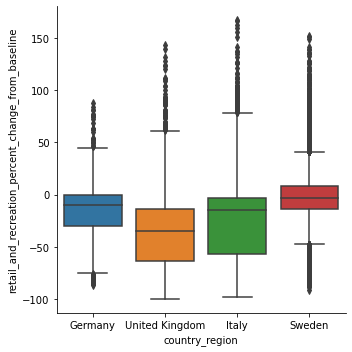

In [35]:
# Differences in mobility patterns across countries (for selected countries) 
# We use the DataFrame gcmr_df_countries we already created
sns.catplot(x="country_region", 
            y="retail_and_recreation_percent_change_from_baseline", 
            kind="box",
            data=gcmr_df_countries)

## Wide and Long Data Format

[Reshaping data](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html)
<img src="https://pandas.pydata.org/pandas-docs/stable/_images/reshaping_melt.png" title='Pandas DataFrame' width="600" height="300"/>

In [36]:
# Visualise across all six mobility variables

# Create an object (mobility_variables) containing the names of the six mobility variables
mobility_variables = ['retail_and_recreation_percent_change_from_baseline',
 'grocery_and_pharmacy_percent_change_from_baseline',
 'parks_percent_change_from_baseline',
 'transit_stations_percent_change_from_baseline',
 'workplaces_percent_change_from_baseline',
 'residential_percent_change_from_baseline']

gcmr_df_countries_long = pd.melt(gcmr_df_countries, id_vars=['country_region','sub_region_1', 'date'], 
                                value_vars=mobility_variables)

In [37]:
gcmr_df_countries_long.head()

,country_region,sub_region_1,date,variable,value
0,Germany,NaN,2020-02-15,retail_and_recreation_percent_change_from_base...,6.0
1,Germany,NaN,2020-02-16,retail_and_recreation_percent_change_from_base...,7.0
2,Germany,NaN,2020-02-17,retail_and_recreation_percent_change_from_base...,2.0
3,Germany,NaN,2020-02-18,retail_and_recreation_percent_change_from_base...,2.0
4,Germany,NaN,2020-02-19,retail_and_recreation_percent_change_from_base...,3.0


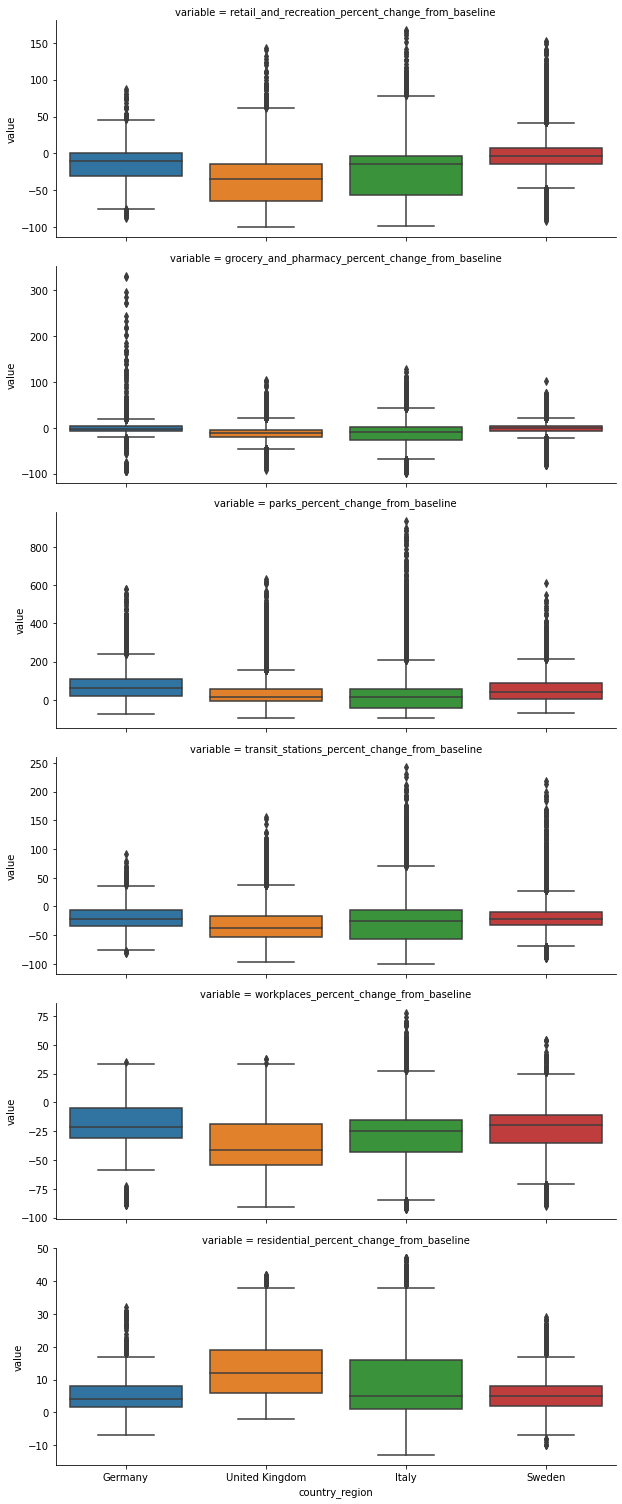

In [38]:
g = sns.catplot(x="country_region", y="value", row="variable", kind="box", 
                # control plot size
                height=3.5, aspect=2.5,
                # set different y axes for each plot
                sharey=False,
                data=gcmr_df_countries_long)

### Visualise your data over time
Mobility trends in the United Kingdom across mobility categories.

In [39]:
# Extract month from year-month-date
# Format datetime as Month-Year
gcmr_df_countries_long.loc[:,'date'] = pd.to_datetime(gcmr_df_countries_long.loc[:,'date'])
gcmr_df_countries_long['Month_Year'] = gcmr_df_countries_long['date'].dt.strftime('%b-%Y')

# The output is a datatime object
gcmr_df_countries_long['Month_Year'].head()

0    Feb-2020
1    Feb-2020
2    Feb-2020
3    Feb-2020
4    Feb-2020
Name: Month_Year, dtype: object

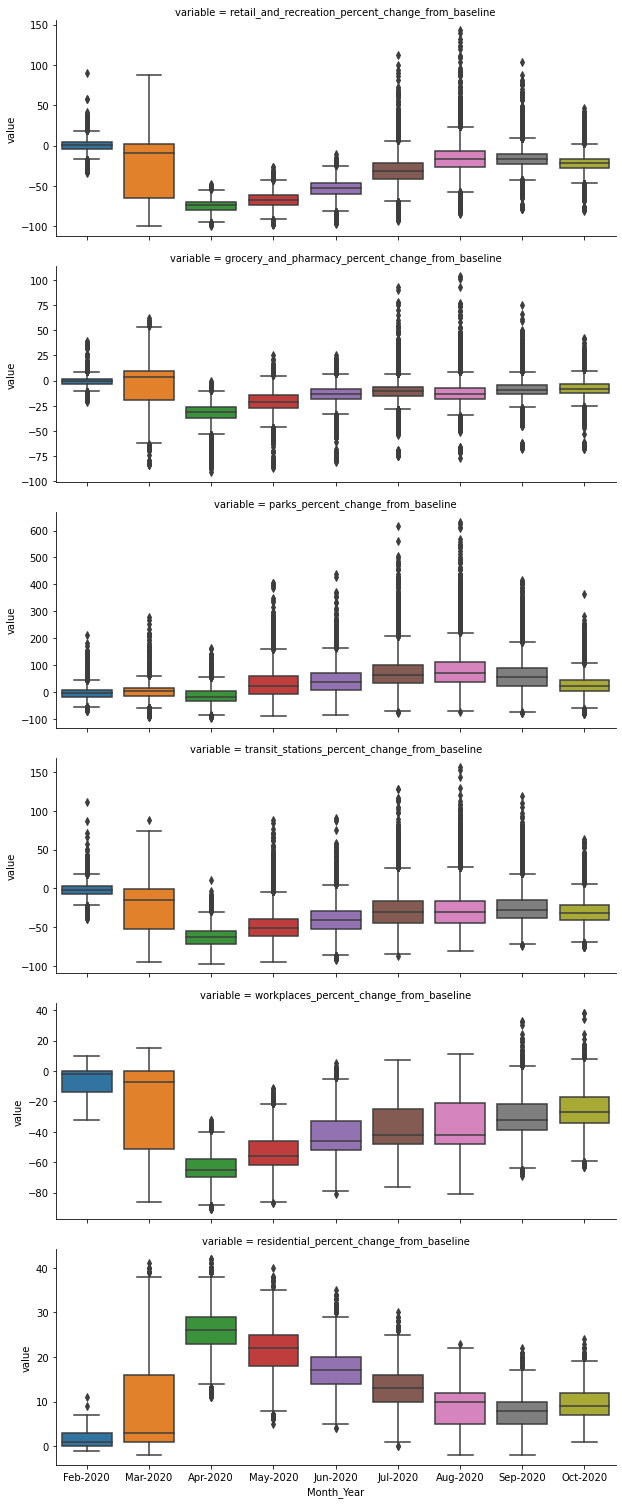

In [40]:
# Select only data about the UK 
gcmr_df_countries_long_UK = gcmr_df_countries_long[(gcmr_df_countries_long['country_region'] == 'United Kingdom')]


# Plot mobility trends in the UK over months and across the six mobility categories 
g = sns.catplot(x="Month_Year", y="value", row="variable",
                kind="box", height=3.5, aspect=2.5,
                sharey=False,
                data=gcmr_df_countries_long_UK)

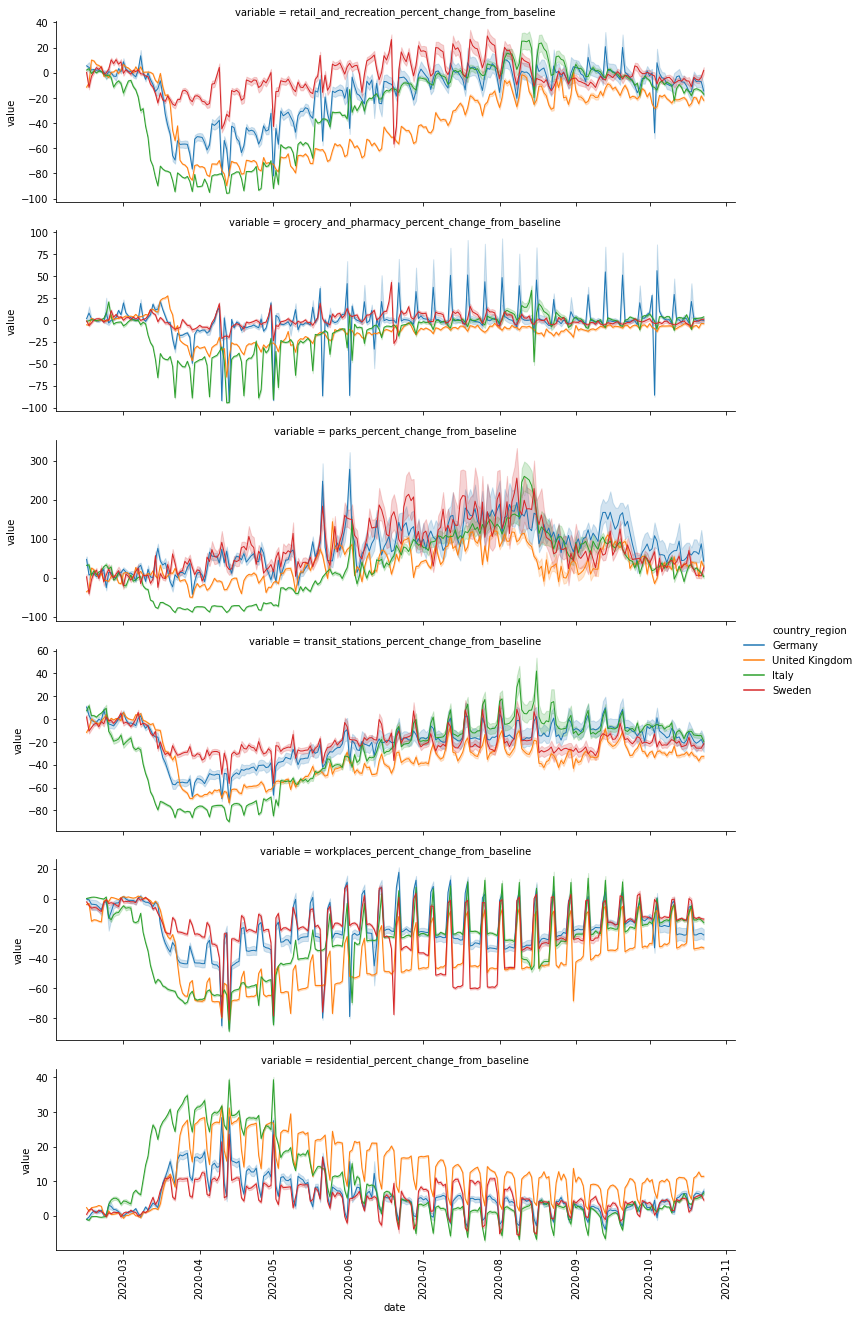

In [41]:
# Visualise daily mobility trends across mobility categories and countries of interest 

gcmr_df_countries_long['date'] = pd.to_datetime(gcmr_df_countries_long['date'])

fig=sns.relplot(x="date",
                y="value",
                hue="country_region",
                col="variable", col_wrap=1,
                height=3, aspect=3.5, linewidth=1,
                facet_kws={'sharey': False, 'sharex': True},
                kind="line", data=gcmr_df_countries_long)
fig.set_xticklabels(rotation=90)

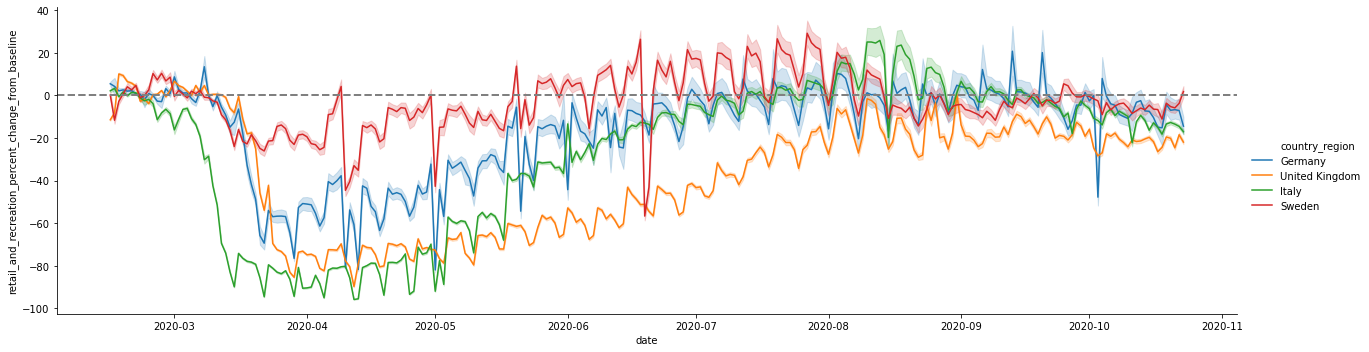

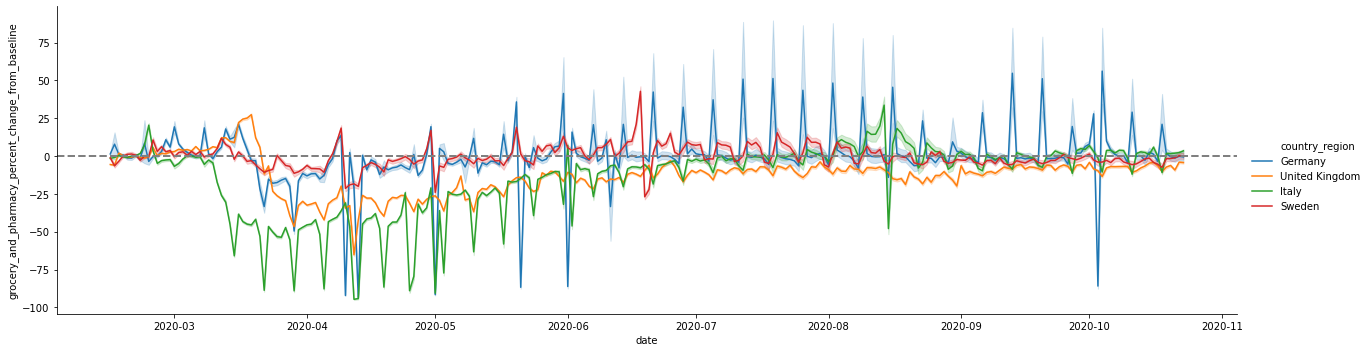

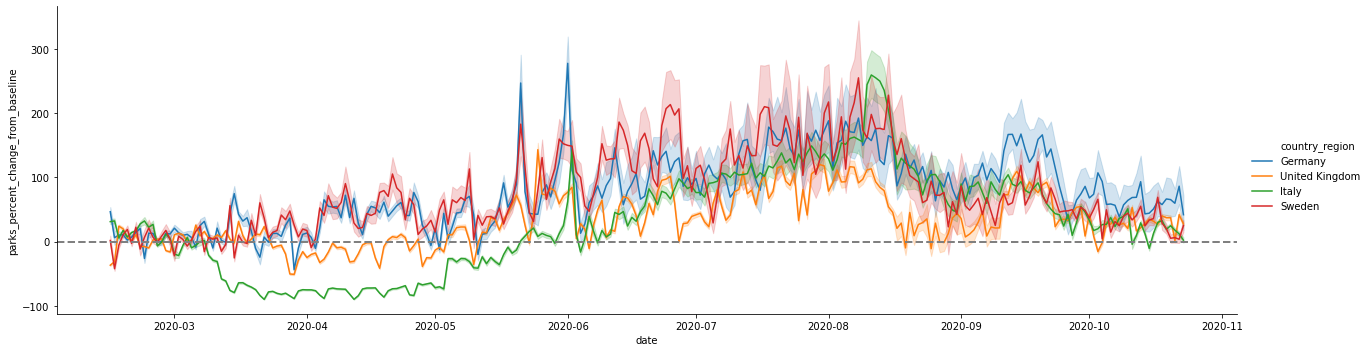

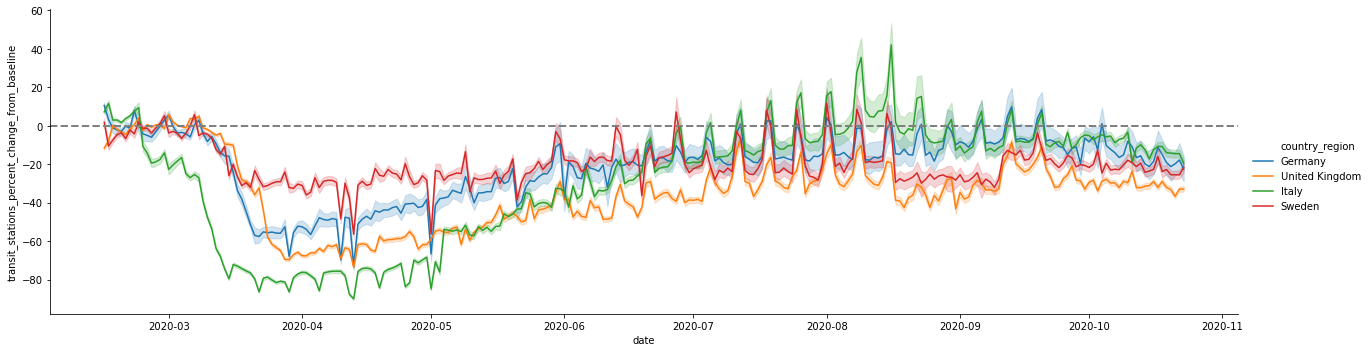

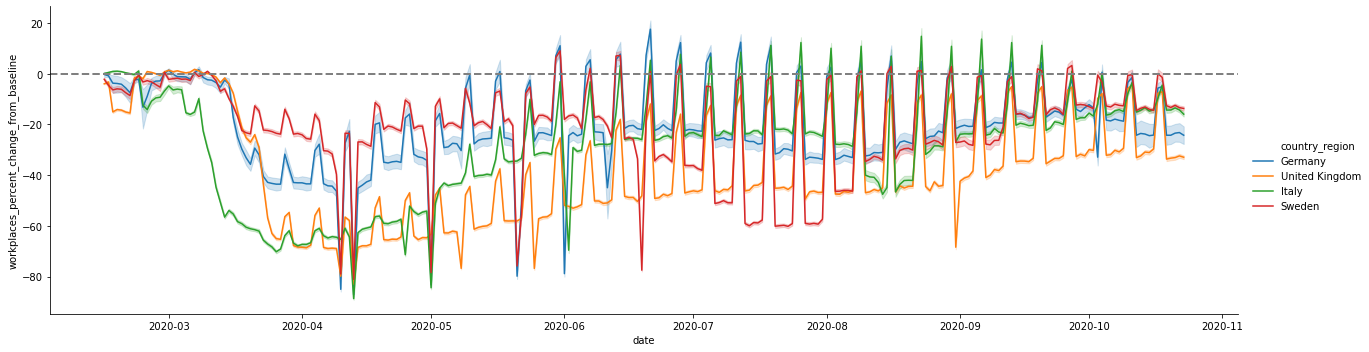

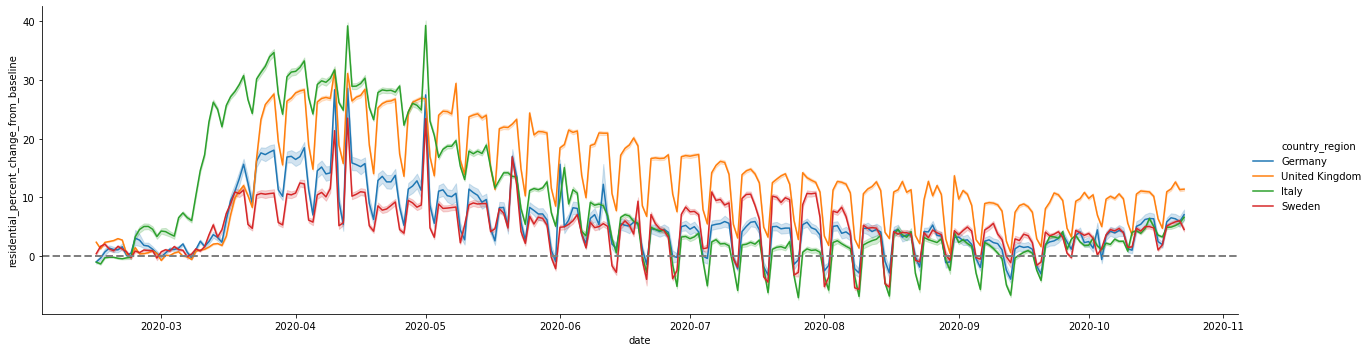

In [42]:
# Alternatively, the 'wide' format of the data and 'for' loop can be used to create a plot similar to the one above
gcmr_df_countries.loc[:,'date'] = pd.to_datetime(gcmr_df_countries.loc[:,'date'])

for group in mobility_variables:
    sns.relplot(x="date", height=5, aspect=3.5,y=group,hue="country_region", kind="line", data=gcmr_df_countries)
    plt.axhline(y=0, color='gray',linestyle='--', lw=2)

### Mobility trends in Essex, United Kingdom

retail_and_recreation_percent_change_from_baseline


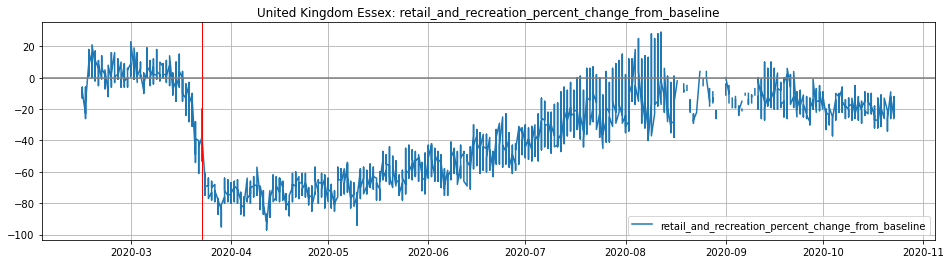

grocery_and_pharmacy_percent_change_from_baseline


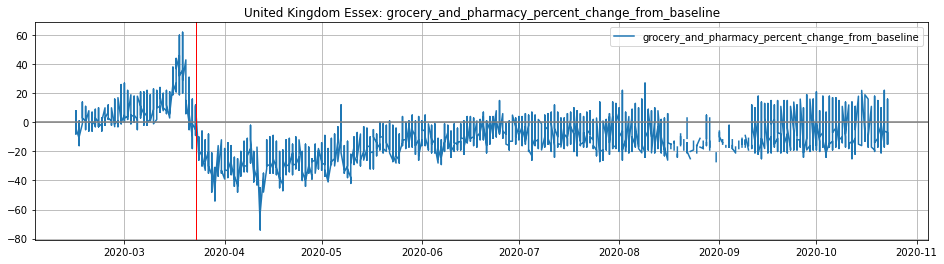

parks_percent_change_from_baseline


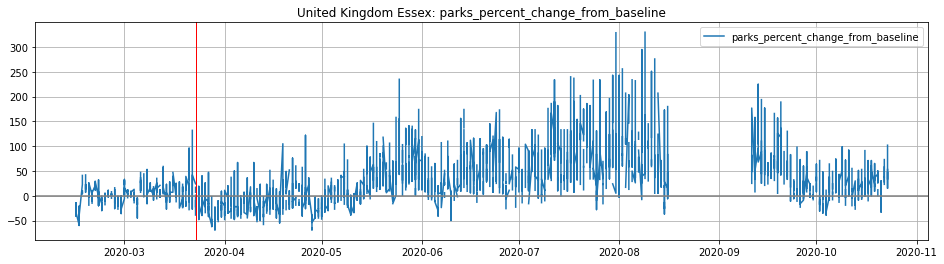

transit_stations_percent_change_from_baseline


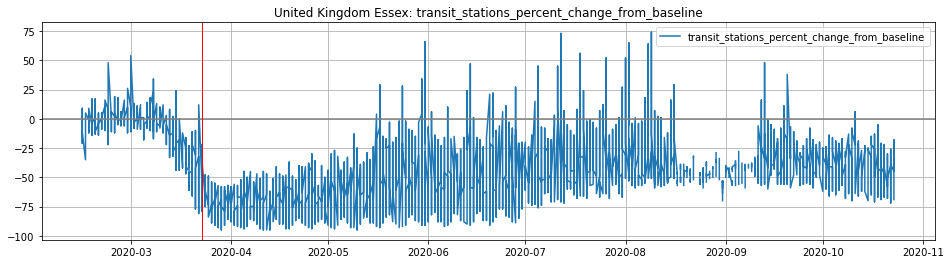

workplaces_percent_change_from_baseline


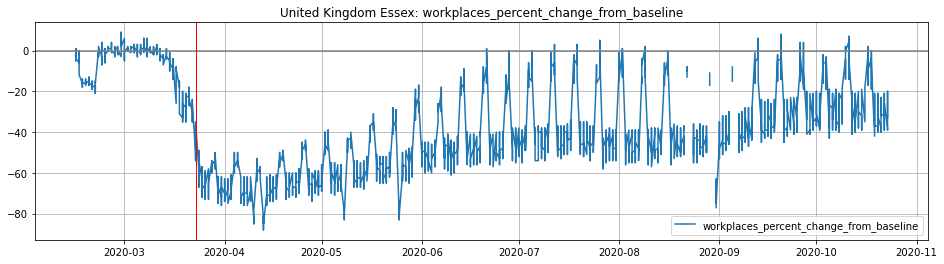

residential_percent_change_from_baseline


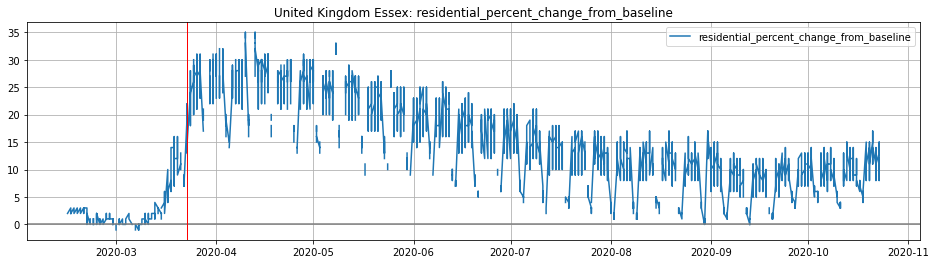

In [43]:
# Reuse the 'gcmr_df_country_UK_county_Essex' DataFrame we already created
# gcmr_df_country_UK_county_Essex = gcmr_df[(gcmr_df['country_region'] == 'United Kingdom') & 
#                                 (gcmr_df['sub_region_1']=='Essex')]

country = 'United Kingdom'
county = 'Essex'

gcmr_df_country_UK_county_Essex.loc[:,'date'] = pd.to_datetime(gcmr_df_country_UK_county_Essex.loc[:,'date'])
gcmr_df_country_UK_county_Essex = gcmr_df_country_UK_county_Essex.sort_values('date', ascending=True)
 
# let's plot all time series for this region
for var in mobility_variables:
    print(var)
     
    fig, ax = plt.subplots(figsize=(16, 4))
    plt.plot(gcmr_df_country_UK_county_Essex['date'], gcmr_df_country_UK_county_Essex[var], label=var)
    ax.axhline(y=0, color='gray')
    ax.axvline(pd.to_datetime('2020-03-23'), color='r', linestyle='-', lw=1)
    plt.title(country + ' '+ county + ': ' + var)
    plt.legend(loc='best') 
    plt.grid()
    plt.show()   

## Acknowledgements
* Wes McKinney. 2017. Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython
* Daniel Chen. 2017. Pandas for Everyone: Python Data Analysis
* Manuel Amunategui. 2020. COVID-19 Community Mobility Reports From Google and Apple - Available to All - Explore with Python. 